In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(1, "../data")

C:\Users\kerem\AppData\Local\Temp\ipykernel_16372\2934369638.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  srate = int(data["EEG"]["srate"])


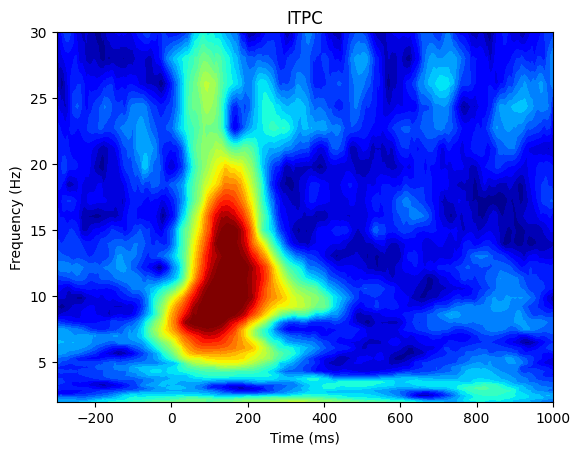

In [ ]:
data = scipy.io.loadmat("../data/sampleEEGdata.mat")

numFrex = 40
minFrex = 2
maxFrex = 30
 
chanlocs = [data["EEG"]['chanlocs'][0][0][0][i][0] for i in range(64)]
srate = int(data["EEG"]["srate"])
dataE = data["EEG"][0][0][15]
timeEEG = data["EEG"][0][0][14]

channel2use = "Pz"
chanidx = chanlocs.index(channel2use)

range_cycles = [3,10]
 
frex = np.logspace(np.log10(minFrex), np.log10(maxFrex), numFrex)
nCycs = np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[1]), numFrex)
time = np.arange(-2, 2, 1/srate)
half_wave = int((len(time) - 1) / 2)
 
nWave = len(time)
nData = dataE.shape[1] * dataE.shape[2]
nConv = nWave + nData - 1
 
dataX = scipy.fft.fft(np.reshape(dataE[chanidx,:,:],(1,nData), order="F"), nConv)
 
tf  = np.zeros((numFrex,dataE.shape[1]))
 
for fi in range(numFrex):
 
    s = nCycs[fi] / (2*np.pi*frex[fi])
    wavelet = np.exp(2*1j*np.pi*frex[fi]*time) * np.exp(-time**2 / (2*s**2))
    waveletX = scipy.fft.fft(wavelet, nConv)
 
    waveletX = waveletX / np.max(waveletX)
 
    as_ = scipy.fft.ifft(waveletX * dataX, nConv)
    as_ = as_[0,half_wave:-half_wave-1]
    as_ = np.reshape(as_, (dataE.shape[1],dataE.shape[2]), order="F")
    tf[fi,:] = np.abs(np.mean(np.exp(1j*np.angle(as_)), 1))
 
 
plt.contourf(np.squeeze(timeEEG), frex, tf, 40, vmin=0, vmax=.6, cmap="jet")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.xlim([-300,1000])
plt.title("ITPC")
plt.show()